<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/OpenActTextDev/ActuarialRegression/blob/main/Notebooks/BigDataDimReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Big Data, Dimension Reduction, and Non-Supervised Learning


### Overview

A. Start with the idea of local regression (polynomials), adding lots of parameters that need to be calibrated. See Section 7.6 of ISLP...

B. Next think of data where there are lots of variables. E.g. biomedical data (sensor), driving data, and so forth. Even for a simple problem like recognize digits, we have 28 x 28 variables. (Think of hi-def, 256 x 256 ).

C. Next, give examples on curse of dimensions from Bauer and Geron.

D. This leads naturally to PCA, a type of dimension reduction

E. Then, we can turn to unsupervised learning
   *  Include anomaly detection and clustering

# A. Many observations ($n$), few features ($p$)

*  This is the traditional set-up in statistics.
*  One can build non-linear models that well approximate a function locally. "Let the data speak for themselves."

### Polynomial Regression

Thinking about a Taylor series expansion, one can use polynomial regression to approximate a function

$$
f(x) = f(x_0) + (x-x_0) f'(x_0) + (x-x_0)^2 \frac{f''(x_0)}{2} + \cdots
$$

From Geron Chapter 4

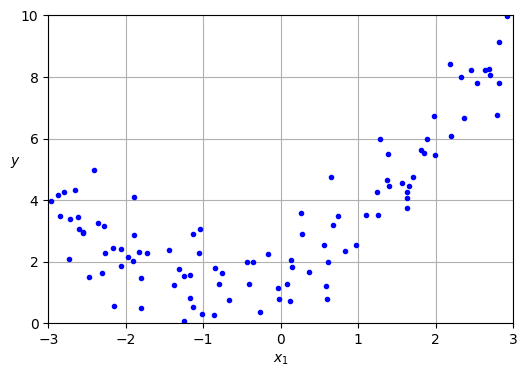

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()



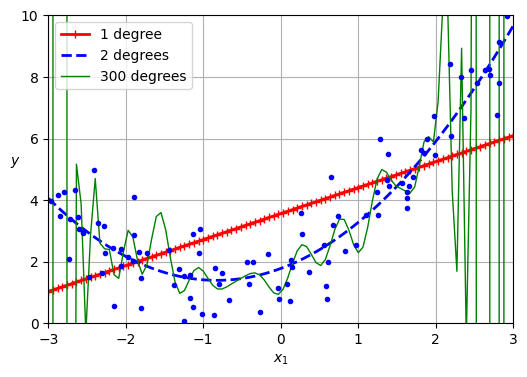

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show() # Geron Figure 4.14



### Local Regression

From *An Introduction to Statistical Learning* (Figure 7.9)

In [4]:

from IPython.display import Image
Image(url='https://raw.githubusercontent.com/OpenActTextDev/ActuarialRegression/refs/heads/main/Figures/ISLPFig7.9.png')


# B. Many Features

*  Suppose there are a large number of features and a limited number of observations ($p > n$).
   *  Then we can implement traditional methods for determining which features are important (variable selection)
   *  This could include regularization techniques such as ridge regression and LASSO
*  Suppose there are a large number of features and observations (big $p$ and $n$)
   *  we have an opportunity to fit complex models that can learn from the data ...

### Curse of Dimensionality

*  Volume grows exponentially with the number of features
   *  Not a lot of “local” information
   *  Observations tend to be close to an edge - **extreme**
   *  Observations can be far from one another


In [5]:
#Not a lot of “local” information
# Number of observations per cell
def Obs_cell(cell_width, p):
    return 100_000 * cell_width ** p

print(Obs_cell(cell_width = 0.5,p=1))
print(Obs_cell(cell_width = 0.5,p=2))
print(Obs_cell(cell_width = 0.5,p=10))
print(Obs_cell(cell_width = 0.5,p=20))
print(Obs_cell(cell_width = 0.5,p=25))


50000.0
25000.0
97.65625
0.095367431640625
0.0029802322387695312


In [6]:
#Observations tend to be close to an edge
# Distance Calculation Using Simulation
def Edge_distance(d, p):
    return 1-(1-d * 2)**p

# Example: p = 2
print(Edge_distance(d=0.001,p=2))
# Example: p = 20
print(Edge_distance(d=0.001,p=20))
# Example: p = 200
print(Edge_distance(d=0.001,p=200))
# Example: p = 2000
print(Edge_distance(d=0.001,p=2000))
# Example: p = 20000
print(Edge_distance(d=0.001,p=20000))

0.0039959999999999996
0.03924904297365728
0.3299483862621775
0.9817575747762494
1.0


In [7]:
# Observations can be far from one another
import numpy as np
import math

# Distance Calculation Using Simulation
def expected_distance(p, n_samples=100000):
    points = np.random.rand(n_samples, p)
    others = np.random.rand(n_samples, p)
    distances = np.linalg.norm(points - others, axis=1)
    return np.mean(distances)

# Example: p = 2
print(expected_distance(2))
# Example: p = 5
print(expected_distance(5))
# Example: p = 20
print(expected_distance(20))

# Distance Calculation using an Approximation
def Approx_expected_distance(p):
    return math.sqrt(p/6) * (1 - 1/(4*p))

# Example: p = 2
print(Approx_expected_distance(2))
# Example: p = 5
print(Approx_expected_distance(5))
# Example: p = 20
print(Approx_expected_distance(20))
# Example: p = 200
print(Approx_expected_distance(200))
# Example: p = 20000
print(Approx_expected_distance(20000))


0.5217328796233617
0.8781323633113289
1.8091641995020211
0.5051814855409225
0.867227382716513
1.802920085121172
5.766285813531388
57.734305231126086


### Challenge: Curse of dimensionality

*  An equation for 𝑓 that is “too flexible” (e.g., number of
parameters grows as our number of observation
grows) is problematic
*  In order to be learnable, we cannot localize too much
*  Since distances in high dimensions are long,
“connecting” the dots to get an obvious relationship
as in a single dimension typically not possible
*  → OUR MODEL NEEDS TO TAKE A STANCE/  IMPOSE SOME STRUCTURE

# Dimension Reduction via Principal Component Analysis

Principal component analysis (PCA) seeks a low-dimensional representation of data.

Consider $p$ features $X_1, \ldots, X_p$ with $n$ observations

$$
\text{data} =
\left(\begin{array}{cccc}
x_{11} & x_{12} & \cdots & x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np} \\
\end{array}\right)
$$
where each column has been centered to have a mean of zero.

The first principal component is
$$
Z_1 = \phi_{11} X_1 + \phi_{21} X_2 + \cdots +\phi_{p1} X_p
$$
that has the largest variance, subject to a normalization constraint, $\sum_{j=1}^p \phi_{j1}^2 = 1$. That is, the loading $\phi_{j1}$ are solutions of the problem

$$
\text{maximize}_{\phi_{11}, \ldots, \phi_{p1}}
\left\{\frac{1}{n} \sum_{i=1}^n \left(\sum_{j=1}^p
\phi_{j1} x_{ij}
  \right)^2
  \right\}
  \text{subject to}
  \sum_{j=1}^p
\phi_{j1}^2 =1.
$$

The second principal component is the linear combination of $X_1,\ldots,X_p$ that has maximal
variance out of all linear combinations that are *uncorrelated* with $Z_1$.

The third principal component is the linear combination of $X_1,\ldots,X_p$ that has maximal
variance out of all linear combinations that are *uncorrelated* with $Z_1$ and $Z_2$. And so forth.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:

#from statsmodels.datasets import get_rdataset
USArrests = get_rdataset('USArrests').data
USArrests.iloc[0:5,]

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


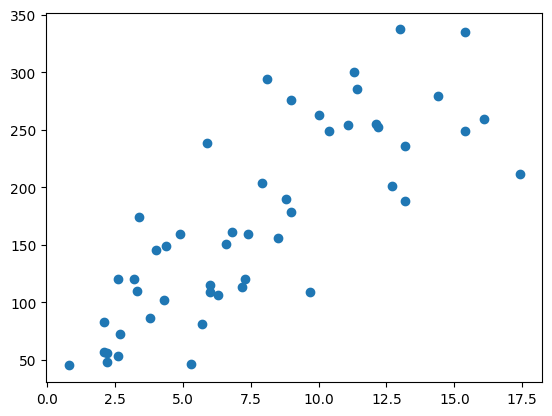

In [11]:
USArrests2 = USArrests[['Murder','Assault']]
plt.scatter(USArrests2.iloc[:,0], USArrests2.iloc[:,1]);

In [12]:
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests2)
USArrests_scaled[0:5,]

array([[1.25517927, 0.79078716],
       [0.51301858, 1.11805959],
       [0.07236067, 1.49381682],
       [0.23470832, 0.23321191],
       [0.28109336, 1.2756352 ]])

In [13]:
pca = PCA(n_components=2)
USArrests2_pca = pca.fit_transform(USArrests2)

type(USArrests2_pca)

numpy.ndarray

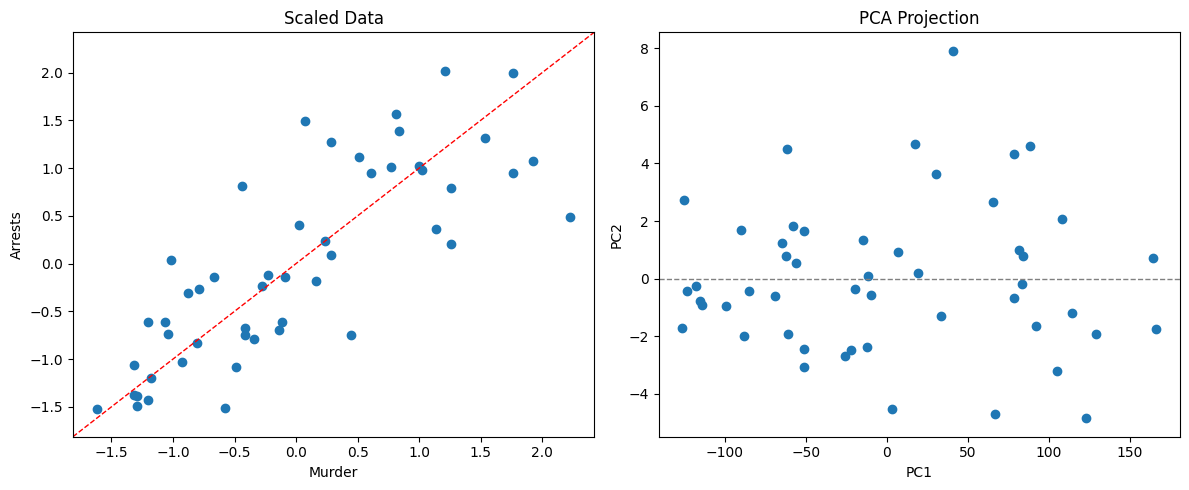

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # (1 row, 2 columns)

# First plot (on axes[0])
axes[0].scatter(USArrests_scaled[:, 0], USArrests_scaled[:, 1])
axes[0].set_title('Scaled Data')  # optional
axes[0].set_xlabel('Murder')
axes[0].set_ylabel('Arrests')
# Add diagonal reference line (y = x)
lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()])   # max of both axes
]
axes[0].plot(lims, lims, 'r--', linewidth=1)  # red dashed line
axes[0].set_xlim(lims)
axes[0].set_ylim(lims)

# Second plot (on axes[1])
axes[1].scatter(USArrests2_pca[:, 0], USArrests2_pca[:, 1])
axes[1].set_title('PCA Projection')  # optional
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
# Add horizontal reference line at y = 0
axes[1].axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

Principal components provide low-dimensional linear surfaces that are closest to the observations.

### Proportion of Variance Explained

The total variance is

$$
\sum_{j=1}^p {\rm{Var}}(X_j) = \sum_m {\rm{Var}}(Z_m)
$$

The variance explained by the *m*th principal component is

$$
{\rm{Var}}(Z_m) = \frac{1}{n} \sum_{i=1}^n z_{im}^2 =
\frac{1}{n} \sum_{i=1}^n \left(\sum_{j=1}^p \phi_{jm} x_{ij}
  \right)^2
$$
The proportion of variance explained by the *m*th principal component is
$$
\frac{\sum_{i=1}^n \left(\sum_{j=1}^p \phi_{jm} x_{ij} \right)^2}{\sum_{i=1}^n \sum_{j=1}^p x_{ij}^2} .
$$


## PCA Setup for MNIST Data


In [15]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import matplotlib.patches as patches  # extra code – for the curved arrow
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay



### Fetch the MNIST data

In [16]:
#from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [17]:
# extra code – it's a bit too long
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [18]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

In [19]:
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 154
d


np.int64(154)

In [20]:

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_
pca.explained_variance_ratio_.sum()  # extra code


np.float64(0.9501960192613031)

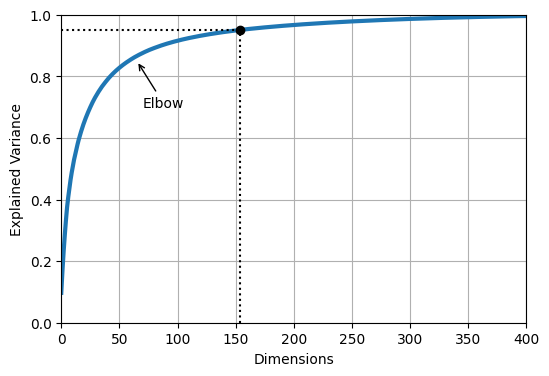

In [21]:
# This cell generates Geron's Figure 8–8

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)

plt.show()

In [22]:
y_train.shape

(60000,)

In [23]:
28 * 28

784

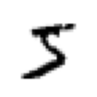

In [24]:
#import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plt.figure(figsize=(1, 1))
some_digit = X_train[0]
plot_digit(some_digit)

plt.show()

In [25]:
y_train[0]

'5'

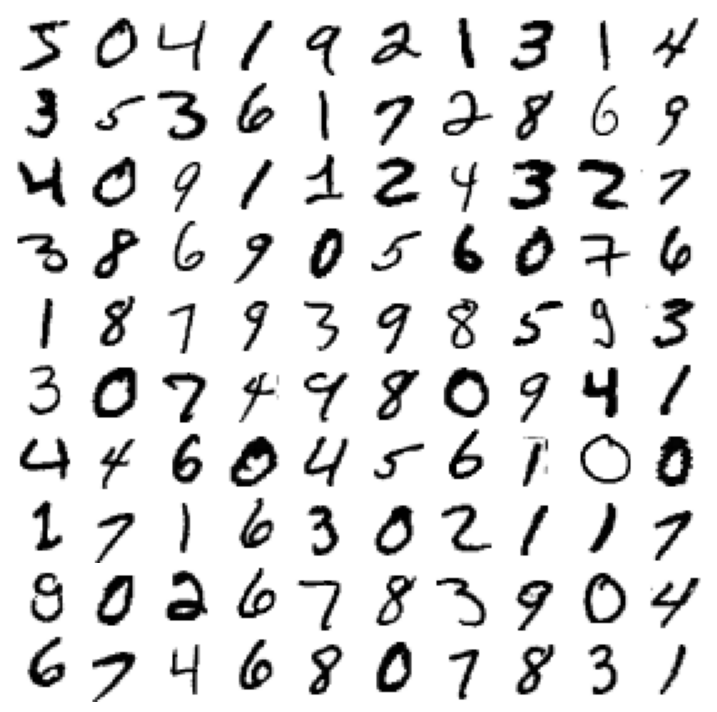

In [26]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [27]:

X_recovered = pca.inverse_transform(X_reduced)


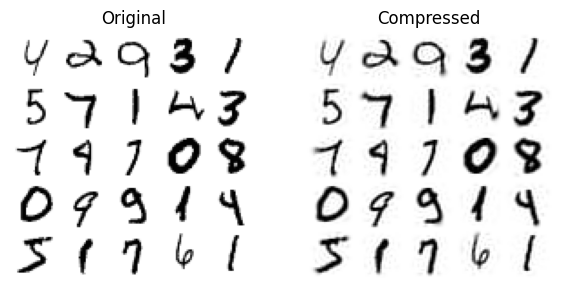

In [28]:

# This cell generates Geron's Figure 8–9

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")


#  Non Supervised Learning

Clustering refers to a very broad set of techniques for finding subgroups, or  *clusters*, in a data set.



## K- Means

K-means clustering is a simple and elegant approach for partitioning a
data set into K distinct, non-overlapping clusters.

Here is the algorithm for K-means clustering:

1. Randomly assign a number, from 1 to K, to each of the observations.

2. Iterate until the cluster assignments stop changing:

  (a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster.

  (b) Assign each observation to the cluster whose centroid is closest
(where closest is defined using Euclidean distance).

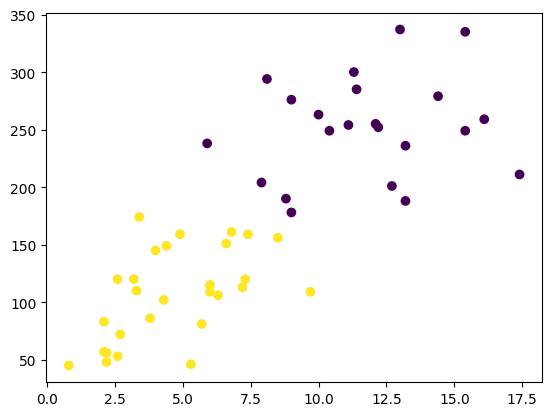

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a scaler so that the features in the dataset can be
# scaled to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
# Create a KMeans model with k=2 clusters.
kmeans = KMeans(n_clusters=2)
# Create a pipeline to link together the scaler and kmeans instance.
pipeline = make_pipeline(scaler,kmeans)
# Build a K-means clustering model by fitting the pipeline
pipeline.fit(USArrests2)
# Predict the cluster labels
labels = pipeline.predict(USArrests2)

# Plot with cluster colors
plt.scatter(USArrests2.iloc[:,0], USArrests2.iloc[:,1], c=labels);

In [30]:
USArrests2

,Murder,Assault
rownames,,
Alabama,13.2,236
Alaska,10.0,263
Arizona,8.1,294
Arkansas,8.8,190
California,9.0,276
Colorado,7.9,204
Connecticut,3.3,110
Delaware,5.9,238
Florida,15.4,335


## Hierarchical Clustering

One potential disadvantage of K-means clustering is that it requires us to
pre-specify the number of clusters K. *Hierarchical clustering* is an alternative approach which does not require that we commit to a particular
choice of K.

Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the
observations, called a *dendrogram*.

**Algorithm Hierarchical Clustering.**

1. Begin with n observations and a measure (such as Euclidean distance) of all the $n(n − 1)/2$ pairwise dissimilarities. Treat each
observation as its own cluster.

2. For i = n, n − 1,..., 2:

   (a) Examine all pairwise inter-cluster dissimilarities among the i
clusters and identify the pair of clusters that are least dissimilar
(that is, most similar). Fuse these two clusters. The dissimilarity
between these two clusters indicates the height in the dendrogram at which the fusion should be placed.

   (b) Compute the new pairwise inter-cluster dissimilarities among
the i − 1 remaining clusters.

In [31]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import StandardScaler
#from statsmodels.datasets import get_rdataset



from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)

USArrests = get_rdataset('USArrests').data
scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

X = USArrests_scaled
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X)


AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [32]:
import pandas as pd # For data management.
import matplotlib.pyplot as plt # For plotting.
from scipy.cluster import hierarchy # For performing hierarchical clustering.

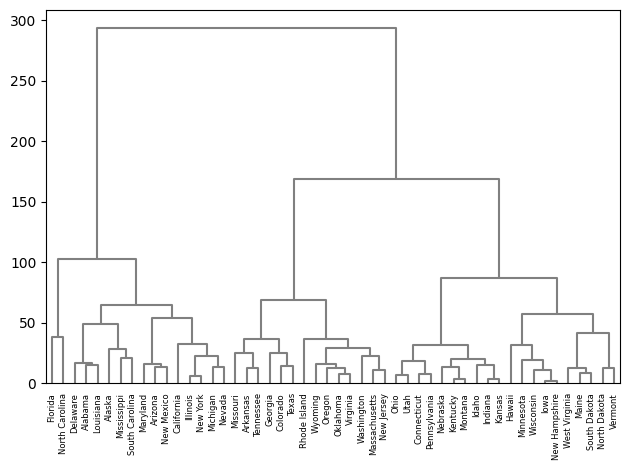

In [33]:
# Perform agglomeratorive hierarchical clustering on the COVID data.
# Code is from https://actuariesinstitute.github.io/cookbook/docs/DAA_M06_Ex5.html

# The SciPy linkage() function performs hierarchical clustering
# and the dendrogram() function can be used to visualize the
# results of the clustering.

# Perform the hierarchical clustering using 'euclidean' distance measure and
# 'complete' linkage (i.e. max distance between points in each cluster).
clusters = hierarchy.linkage(USArrests,metric='euclidean',method='complete')
  # Instead of using 'euclidean' as the distance between observations, try using
  # other metrics such as 'correlation'.
  # Instead of using 'complete' as the linkage between clusters, try using
  # other methods such as 'single', 'average' or 'centroid'.

# Plot the dendrogram, using countries as labels.
hierarchy.dendrogram(clusters,
           labels=USArrests.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=6,
           color_threshold = 0,
           above_threshold_color='grey')
plt.tight_layout()

plt.show()

### Cut the dendrogram to create clusters

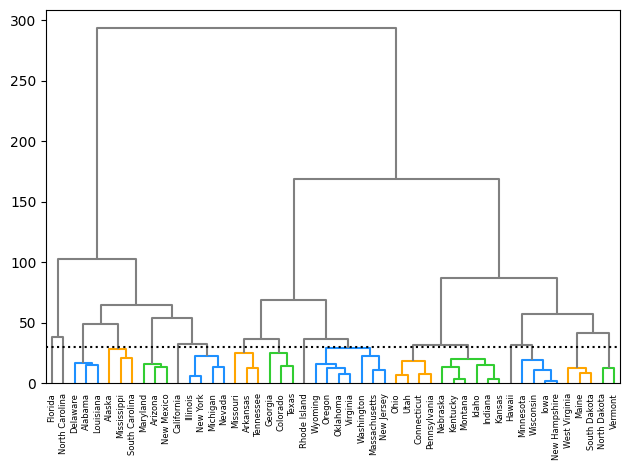

In [34]:
# Plot a horizontal line on the dendrogram to 'cut' it into different clusters.

# Specify the height at which the dengrogram will be 'cut' to create clusters.
cut_height = 30

# Set the colour palette to be used in the dendrogram.
colour1 = 'dodgerblue'
colour2 = 'orange'
colour3 = 'limegreen'
hierarchy.set_link_color_palette([colour1, colour2, colour3])

hierarchy.dendrogram(clusters,
           labels=USArrests.index.tolist(),
           leaf_rotation=90,
                    leaf_font_size=6,
                    color_threshold=cut_height,
                    above_threshold_color='grey')
plt.tight_layout()
plt.plot((0,600),(cut_height,cut_height),color='black',linestyle=':')
# plt.savefig('M06 Fig10.jpg')
plt.show()